# Preprocessing

In [1]:
#import require libraries
import csv
from Bio import pairwise2
import pandas as pd

In [2]:
# create dataframes of the require files
df_fegenie = pd.read_csv('FeGenie-geneSummary.csv')
df_ref = pd.read_csv('combined_output.csv')

In [3]:
df_fegenie

,category,genome/assembly,orf,HMM,bitscore,bitscore_cutoff,clusterID,heme_c_binding_motifs,heme_b_binding_motifs,hematite_binding_motifs,protein_sequence
0,iron_aquisition-siderophore_transport_potential,39834.fas,39834_137,ExbB-family,94.3,22.3,1,0,0,0,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,39834.fas,39834_138,ExbD-family,97.2,32.7,1,0,0,0,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,39834.fas,39834_139,TonB-family,47.6,21.8,1,0,0,0,MKNYGLSNLNSFLLALAIYIGIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,39834.fas,39834_168,FpvE-family-permease,39.1,25.8,2,0,0,0,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,39834.fas,39834_170,FpvC-family-siderophore-transport,54.8,18.5,2,0,0,0,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...,...,...,...,...,...,...
960,iron_aquisition-siderophore_transport,56477.fas,56477_1355,PvuD-family-ATP-binding-protein,188.6,172.0,503,0,0,0,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
961,iron_aquisition-siderophore_transport,56477.fas,56477_1356,HatD-family-substrate-binding-protein,113.0,27.5,503,0,0,0,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
962,iron_aquisition-siderophore_transport_potential,56477.fas,56477_1367,ExbB-family,120.9,22.3,504,0,0,0,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
963,iron_aquisition-siderophore_transport_potential,56477.fas,56477_1368,ExbD-family,74.1,32.7,504,0,0,0,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...


In [4]:
selection = ['category','genome/assembly','HMM','orf','protein_sequence']
df1 = df_fegenie[selection]
df1

,category,genome/assembly,HMM,orf,protein_sequence
0,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,39834.fas,TonB-family,39834_139,MKNYGLSNLNSFLLALAIYIGIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,39834.fas,FpvE-family-permease,39834_168,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,39834.fas,FpvC-family-siderophore-transport,39834_170,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...
960,iron_aquisition-siderophore_transport,56477.fas,PvuD-family-ATP-binding-protein,56477_1355,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
961,iron_aquisition-siderophore_transport,56477.fas,HatD-family-substrate-binding-protein,56477_1356,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
962,iron_aquisition-siderophore_transport_potential,56477.fas,ExbB-family,56477_1367,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
963,iron_aquisition-siderophore_transport_potential,56477.fas,ExbD-family,56477_1368,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...


In [5]:
df1.protein_sequence.describe()

count                                                   965
unique                                                  519
top       MSVTKQLLQMQADAHHLWVKFHNYHWNVKGLQFFSIHEYTEKAYEE...
freq                                                     27
Name: protein_sequence, dtype: object

In [6]:
#Drop duplicates
df1 = df1.drop_duplicates(['protein_sequence'])
df1

,category,genome/assembly,HMM,orf,protein_sequence
0,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,39834.fas,TonB-family,39834_139,MKNYGLSNLNSFLLALAIYIGIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,39834.fas,FpvE-family-permease,39834_168,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,39834.fas,FpvC-family-siderophore-transport,39834_170,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...
919,iron_gene_regulation,58440.fas,PF01475-Iron_dependent_repressor-fur_family,58440_308,MLKKHELKATPQRLCVLKILKRHEHPNIDELYTEIKKEYPSISLAT...
925,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_669,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...
927,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...
929,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...


In [7]:
df_ref

,family name,gene sequence,sequence
0,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...
1,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...
3,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...
4,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...
5,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...
6,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...
7,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
8,tonB3,48,MKTFISNHKNQSSFITLFVFTPLFFVFLYSKDFLHIQPNETIKENK...
9,chuB,48,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...


In [8]:
## Comparing the protein sequences based on global alignment
def calculate_similarity(seq1, seq2):
    # Calculate the similarity of two sequences as a percentage
    alignments = pairwise2.align.globalxx(seq1, seq2)
    max_score = max(alignments, key=lambda x: x.score)[2]
    return max_score / max(len(seq1), len(seq2)) * 100

In [9]:

# Initialize an empty list to store the result rows
result_rows = []


In [ ]:
# Iterate over each combination of rows from df1 and df_ref
for index1, row1 in df1.iterrows():
    for index2, row2 in df_ref.iterrows():
        # Calculate similarity score
        similarity = calculate_similarity(row1['protein_sequence'], row2['sequence'])
        
        # Combine all columns from both rows and add the similarity score
        combined_row = {**row1.to_dict(), **row2.to_dict(), 'similarity_score': similarity}
        
        # Append the combined row to the list
        result_rows.append(combined_row)


In [11]:
# Create a dataframe from the result rows
combined_df = pd.DataFrame(result_rows)

In [12]:
combined_df

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
16084,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,25.852273
16085,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,28.827362
16086,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,25.852273
16087,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,24.929577


In [13]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_similarity_results.csv', index=False)


In [1]:
import pandas as pd

# new

In [7]:
df = pd.read_csv('combined_similarity_results.csv')
df

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
16084,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,25.852273
16085,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,28.827362
16086,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,25.852273
16087,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_1379,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,24.929577


In [8]:
df.similarity_score.describe()

count    16089.000000
mean        29.969562
std         12.297510
min          8.741722
25%         23.262840
50%         28.398792
75%         35.223881
max        100.000000
Name: similarity_score, dtype: float64

In [9]:
df.protein_sequence.describe()

count                                                 16089
unique                                                  519
top       MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
freq                                                     31
Name: protein_sequence, dtype: object

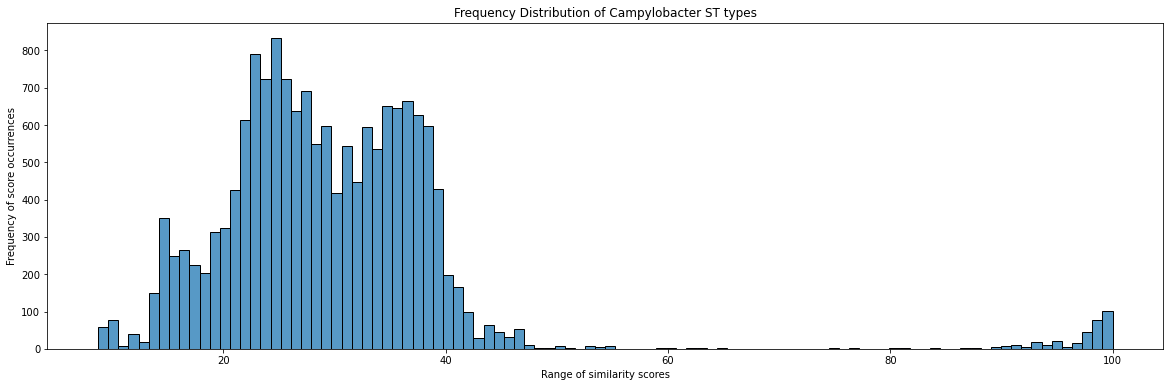

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.histplot(data=df, x='similarity_score', kde=False, bins = 100)


# Set the title and labels for the plot
plt.title('Frequency Distribution of Campylobacter ST types')
plt.xlabel('Range of similarity scores')
plt.ylabel('Frequency of score occurrences')

plt.savefig('Frequency distribution of ST types.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [11]:
# Create a new DataFrame with only 100% similarity
df_100_similarity = df[df['similarity_score'] == 100.0]

In [12]:
df_100_similarity.protein_sequence.describe()

count                                                    18
unique                                                   18
top       MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
freq                                                      1
Name: protein_sequence, dtype: object

In [13]:
df_100_similarity = df_100_similarity.drop_duplicates(['protein_sequence'])
df_100_similarity

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
853,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_1377,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...,exbB2,48,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...,100.0
893,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_1378,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,exbD2,48,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,100.0
2299,iron_aquisition-siderophore_transport,50707.fas,PvuD-family-ATP-binding-protein,50707_1164,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,100.0
2427,iron_aquisition-siderophore_transport,50707.fas,FpvE-family-permease,50707_1355,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,chuB,48,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,100.0
2487,iron_aquisition-siderophore_transport,50707.fas,HatD-family-substrate-binding-protein,50707_1357,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,100.0
2554,iron_aquisition-siderophore_transport_potential,80512.fas,ExbB-family,80512_139,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.0
3898,iron_aquisition-siderophore_transport_potential,78528.fas,ExbD-family,78528_200,MIKTEMAHKEEELSEINITPFIDIMLVLLIVFMAVTPLITSSIKIE...,exbD1,48,MIKTEMAHKEEELSEINITPFIDIMLVLLIVFMAVTPLITSSIKIE...,100.0
4764,iron_aquisition-siderophore_transport,16367.fas,FpvE-family-permease,16367_1206,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,100.0
5674,iron_aquisition-siderophore_transport_potential,16184.fas,ExbD-family,16184_145,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,100.0
5704,iron_aquisition-iron_transport,16184.fas,FbpB-FutB-family-iron-permease,16184_206,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,100.0


In [14]:
df_100_similarity.protein_sequence.describe()

count                                                    18
unique                                                   18
top       MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
freq                                                      1
Name: protein_sequence, dtype: object

In [15]:
df_above95 = df[df['similarity_score'] >= 95.0]
df_above95 = df_above95.drop_duplicates('protein_sequence')
df_above95

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,39834.fas,YfeB-family-membrane-proteins,39834_195,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,97.350993
186,iron_aquisition-iron_transport,39834.fas,FbpB-FutB-family-iron-permease,39834_196,MYKSLKYYKLWAILLALFLALPIFGIFAELFYILFQNFNASDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
220,iron_aquisition-iron_transport,39834.fas,FutA1-family-iron-binding-proteins,39834_197,MKKIFFMFLTAVSFLGASELNIYSARHYDADFQIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,99.402985
...,...,...,...,...,...,...,...,...,...
15763,iron_aquisition-siderophore_transport,69854.fas,PvuD-family-ATP-binding-protein,69854_1399,MLKIHDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,chuC,48,MLKIHNLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,98.069498
15903,iron_aquisition-iron_transport,58440.fas,FbpB-FutB-family-iron-permease,58440_195,MYKTLKYYKLGAILLALFLALPIFGIFAELLYILFQNFNTSDLIQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
16023,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
16056,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,99.014085


In [16]:
df_above90 = df[df['similarity_score'] >= 90.0]
df_above90 = df_above90.drop_duplicates('protein_sequence')
df_above90

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,39834.fas,YfeB-family-membrane-proteins,39834_195,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,97.350993
186,iron_aquisition-iron_transport,39834.fas,FbpB-FutB-family-iron-permease,39834_196,MYKSLKYYKLWAILLALFLALPIFGIFAELFYILFQNFNASDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
220,iron_aquisition-iron_transport,39834.fas,FutA1-family-iron-binding-proteins,39834_197,MKKIFFMFLTAVSFLGASELNIYSARHYDADFQIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,99.402985
...,...,...,...,...,...,...,...,...,...
15903,iron_aquisition-iron_transport,58440.fas,FbpB-FutB-family-iron-permease,58440_195,MYKTLKYYKLGAILLALFLALPIFGIFAELLYILFQNFNTSDLIQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
15989,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_669,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,cfrA,48,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,94.261119
16023,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
16056,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,99.014085


In [17]:
df_above85 = df[df['similarity_score'] >= 85.0]
df_above85 = df_above85.drop_duplicates('protein_sequence')
df_above85

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,39834.fas,YfeB-family-membrane-proteins,39834_195,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,97.350993
186,iron_aquisition-iron_transport,39834.fas,FbpB-FutB-family-iron-permease,39834_196,MYKSLKYYKLWAILLALFLALPIFGIFAELFYILFQNFNASDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
220,iron_aquisition-iron_transport,39834.fas,FutA1-family-iron-binding-proteins,39834_197,MKKIFFMFLTAVSFLGASELNIYSARHYDADFQIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,99.402985
...,...,...,...,...,...,...,...,...,...
15903,iron_aquisition-iron_transport,58440.fas,FbpB-FutB-family-iron-permease,58440_195,MYKTLKYYKLGAILLALFLALPIFGIFAELLYILFQNFNTSDLIQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
15989,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_669,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,cfrA,48,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,94.261119
16023,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
16056,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,99.014085


In [18]:
df_above80 = df[df['similarity_score'] >= 80.0]
df_above80 = df_above80.drop_duplicates('protein_sequence')
df_above80

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,39834.fas,YfeB-family-membrane-proteins,39834_195,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,97.350993
186,iron_aquisition-iron_transport,39834.fas,FbpB-FutB-family-iron-permease,39834_196,MYKSLKYYKLWAILLALFLALPIFGIFAELFYILFQNFNASDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
220,iron_aquisition-iron_transport,39834.fas,FutA1-family-iron-binding-proteins,39834_197,MKKIFFMFLTAVSFLGASELNIYSARHYDADFQIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,99.402985
...,...,...,...,...,...,...,...,...,...
15903,iron_aquisition-iron_transport,58440.fas,FbpB-FutB-family-iron-permease,58440_195,MYKTLKYYKLGAILLALFLALPIFGIFAELLYILFQNFNTSDLIQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
15989,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_669,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,cfrA,48,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,94.261119
16023,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
16056,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,99.014085


In [19]:
df_above75 = df[df['similarity_score'] >= 75.0]
df_above75 = df_above75.drop_duplicates('protein_sequence')
df_above75

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,39834.fas,YfeB-family-membrane-proteins,39834_195,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,97.350993
186,iron_aquisition-iron_transport,39834.fas,FbpB-FutB-family-iron-permease,39834_196,MYKSLKYYKLWAILLALFLALPIFGIFAELFYILFQNFNASDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
220,iron_aquisition-iron_transport,39834.fas,FutA1-family-iron-binding-proteins,39834_197,MKKIFFMFLTAVSFLGASELNIYSARHYDADFQIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,99.402985
...,...,...,...,...,...,...,...,...,...
15903,iron_aquisition-iron_transport,58440.fas,FbpB-FutB-family-iron-permease,58440_195,MYKTLKYYKLGAILLALFLALPIFGIFAELLYILFQNFNTSDLIQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
15989,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_669,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,cfrA,48,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,94.261119
16023,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
16056,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,99.014085


In [20]:
df_above70 = df[df['similarity_score'] >= 70.0]
df_above70 = df_above70.drop_duplicates('protein_sequence')
df_above70

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,39834.fas,ExbB-family,39834_137,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,39834.fas,ExbD-family,39834_138,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,39834.fas,YfeB-family-membrane-proteins,39834_195,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,97.350993
186,iron_aquisition-iron_transport,39834.fas,FbpB-FutB-family-iron-permease,39834_196,MYKSLKYYKLWAILLALFLALPIFGIFAELFYILFQNFNASDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
220,iron_aquisition-iron_transport,39834.fas,FutA1-family-iron-binding-proteins,39834_197,MKKIFFMFLTAVSFLGASELNIYSARHYDADFQIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,99.402985
...,...,...,...,...,...,...,...,...,...
15903,iron_aquisition-iron_transport,58440.fas,FbpB-FutB-family-iron-permease,58440_195,MYKTLKYYKLGAILLALFLALPIFGIFAELLYILFQNFNTSDLIQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,97.959184
15989,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_669,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,cfrA,48,MKKICLSVCAIGLLSSNAISQNVELDSSIVSASGFTQDIKEAPATI...,94.261119
16023,iron_aquisition-iron_transport,58440.fas,FeoB-family-iron-transporter,58440_1216,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
16056,iron_aquisition-siderophore_transport,58440.fas,PirA-family-siderophore-receptor,58440_1378,MHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,99.014085


In [21]:
# Get the protein sequences from df_above80
sequences_to_remove = df_above80['protein_sequence'].unique()

# Filter out the rows in df1 that have protein sequences with 80% similarity
df1_filtered = df1[~df1['protein_sequence'].isin(sequences_to_remove)]


In [24]:
df1_filtered

,category,genome/assembly,HMM,orf,protein_sequence
2,iron_aquisition-siderophore_transport_potential,39834.fas,TonB-family,39834_139,MKNYGLSNLNSFLLALAIYIGIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,39834.fas,FpvE-family-permease,39834_168,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,39834.fas,FpvC-family-siderophore-transport,39834_170,MKKIILFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
8,iron_gene_regulation,39834.fas,PF01475-Iron_dependent_repressor-fur_family,39834_306,MLKKHELKATPQRLCVLKILKRHEHPNIDELYTEIKKEYPSISLAT...
9,iron_gene_regulation,39834.fas,PF01475-Iron_dependent_repressor-fur_family,39834_379,MLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDTHYTP...
...,...,...,...,...,...
907,iron_aquisition-siderophore_transport,69854.fas,PirA-family-siderophore-receptor,69854_1480,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...
908,iron_aquisition-siderophore_transport,69854.fas,PirA-family-siderophore-receptor,69854_1481,MLVIAQGAFTSLGFGSRLNWTVDDKNNIYFDIERYINEISVNSTSS...
912,iron_aquisition-siderophore_transport,58440.fas,FpvE-family-permease,58440_167,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSIAGGITHG...
913,iron_aquisition-siderophore_transport,58440.fas,FpvC-family-siderophore-transport,58440_169,MKKILLFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...


In [25]:
#Save the filtered DataFrame to a new CSV file

df1_filtered.to_csv('below80.csv', index=False)

In [27]:
import pandas as pd

def convert_csv_to_fasta(csv_file, fasta_file, sequence_column='protein_sequence'):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Open a file to write the FASTA formatted sequences
    with open(fasta_file, 'w') as fasta:
        for index, row in df.iterrows():
            # Write the header line for FASTA format
            fasta.write(f'>seq_{index}\n')
            # Write the sequence, splitting into lines if needed
            fasta.write('\n'.join([row[sequence_column][i:i+60] for i in range(0, len(row[sequence_column]), 60)]))
            fasta.write('\n')



In [34]:

def convert_csv_to_fasta(csv_file, fasta_file, sequence_column='protein_sequence', category_column='category'):
    # Read the CSV file
    df = pd.read_csv(csv_file)

    # Open a file to write the FASTA formatted sequences
    with open(fasta_file, 'w') as fasta:
        for index, row in df.iterrows():
            # Write the header line for FASTA format, including the category
            fasta.write(f'>seq_{index}_{row[category_column]}\n')
            # Write the sequence, splitting into lines if needed
            fasta.write('\n'.join([row[sequence_column][i:i+60] for i in range(0, len(row[sequence_column]), 60)]))
            fasta.write('\n')

In [35]:
# Usage
csv_file_path = 'below80.csv'  # Replace with your CSV file path
fasta_file_path = 'output.fasta'  # The output FASTA file path
convert_csv_to_fasta(csv_file_path, fasta_file_path)


In [36]:
import pandas as pd

# Reading the CSV file without headers
df = pd.read_csv('TZ4EN839016-Alignment-HitTable.csv', header=None)



In [37]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,seq_0_iron_aquisition-siderophore_transport_po...,WP_002867816.1,99.228,259,2,0,1,259,1,259,0.000000e+00,513.0,99.61
1,seq_0_iron_aquisition-siderophore_transport_po...,WP_002859784.1,99.228,259,2,0,1,259,1,259,0.000000e+00,511.0,99.23
2,seq_0_iron_aquisition-siderophore_transport_po...,WP_002876984.1,98.456,259,4,0,1,259,1,259,0.000000e+00,508.0,98.46
3,seq_0_iron_aquisition-siderophore_transport_po...,WP_012006621.1,98.069,259,5,0,1,259,1,259,0.000000e+00,506.0,98.07
4,seq_0_iron_aquisition-siderophore_transport_po...,WP_002868764.1,97.683,259,6,0,1,259,1,259,0.000000e+00,506.0,98.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,seq_188_iron_aquisition-siderophore_transport,ETN90170.1,99.099,222,2,0,75,296,1,222,2.740000e-164,453.0,100.00
5089,seq_188_iron_aquisition-siderophore_transport,ETN90171.1,97.778,45,1,0,1,45,1,45,6.680000e-24,89.7,97.78
5090,seq_189_iron_gene_regulation,WP_002854244.1,99.237,131,1,0,1,131,6,136,1.210000e-93,264.0,100.00
5091,seq_189_iron_gene_regulation,WP_002876900.1,98.473,131,2,0,1,131,6,136,5.450000e-93,262.0,99.24


In [38]:
# Adding your specific headers
df.columns = [
    'query acc.ver', 'subject acc.ver', '% identity', 'alignment length',
    'mismatches', 'gap opens', 'q. start', 'q. end', 's. start', 's. end',
    'evalue', 'bit score', '% positives'
]



In [39]:
df

,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives
0,seq_0_iron_aquisition-siderophore_transport_po...,WP_002867816.1,99.228,259,2,0,1,259,1,259,0.000000e+00,513.0,99.61
1,seq_0_iron_aquisition-siderophore_transport_po...,WP_002859784.1,99.228,259,2,0,1,259,1,259,0.000000e+00,511.0,99.23
2,seq_0_iron_aquisition-siderophore_transport_po...,WP_002876984.1,98.456,259,4,0,1,259,1,259,0.000000e+00,508.0,98.46
3,seq_0_iron_aquisition-siderophore_transport_po...,WP_012006621.1,98.069,259,5,0,1,259,1,259,0.000000e+00,506.0,98.07
4,seq_0_iron_aquisition-siderophore_transport_po...,WP_002868764.1,97.683,259,6,0,1,259,1,259,0.000000e+00,506.0,98.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5088,seq_188_iron_aquisition-siderophore_transport,ETN90170.1,99.099,222,2,0,75,296,1,222,2.740000e-164,453.0,100.00
5089,seq_188_iron_aquisition-siderophore_transport,ETN90171.1,97.778,45,1,0,1,45,1,45,6.680000e-24,89.7,97.78
5090,seq_189_iron_gene_regulation,WP_002854244.1,99.237,131,1,0,1,131,6,136,1.210000e-93,264.0,100.00
5091,seq_189_iron_gene_regulation,WP_002876900.1,98.473,131,2,0,1,131,6,136,5.450000e-93,262.0,99.24


In [40]:
# Saving the DataFrame with new headers to a new CSV file
df.to_csv('blast_hits.csv', index=False)


In [42]:
blast_hits_df = pd.read_csv('blast_hits.csv')

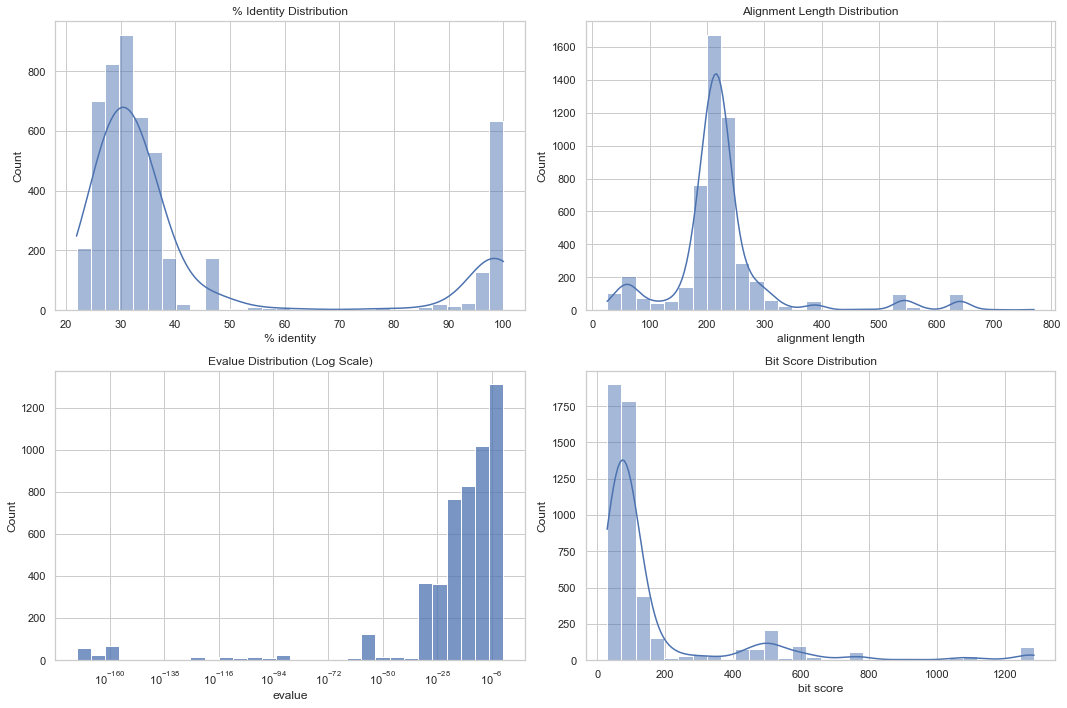

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting up the visualization style
sns.set(style="whitegrid")

# Creating subplots for different distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of % Identity
sns.histplot(blast_hits_df['% identity'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('% Identity Distribution')

# Distribution of Alignment Length
sns.histplot(blast_hits_df['alignment length'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Alignment Length Distribution')

# Adjust 'evalue' to avoid log scale issues with zeros or negative values
adjusted_evalues = blast_hits_df['evalue'].replace(0, np.nan)  # Replace 0 with NaN
adjusted_evalues.fillna(1e-6, inplace=True)  # Replace NaN (originally 0) with a small number

# Distribution of Evalue
sns.histplot(adjusted_evalues, bins=30, ax=axes[1, 0], kde=False, log_scale=True)
axes[1, 0].set_title('Evalue Distribution (Log Scale)')

# Distribution of Bit Score
sns.histplot(blast_hits_df['bit score'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Bit Score Distribution')


plt.tight_layout()

plt.savefig('distributions.png')

plt.show()


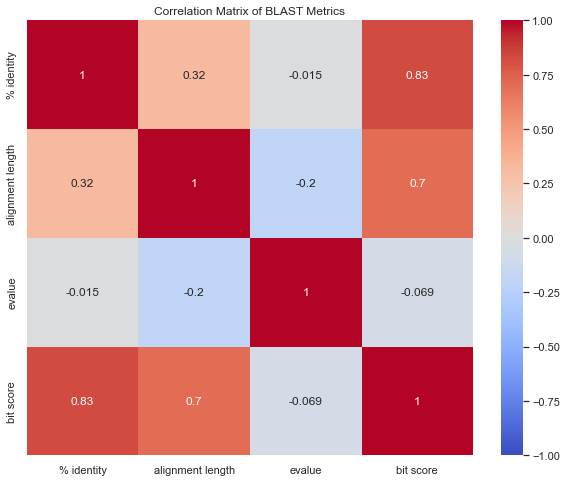

In [49]:
# Correlation analysis between key metrics
correlation_metrics = blast_hits_df[['% identity', 'alignment length', 'evalue', 'bit score']]
correlation_matrix = correlation_metrics.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of BLAST Metrics')

plt.savefig('correlation.png')

plt.show()


In [31]:
import pandas as pd
from Bio.Blast import NCBIWWW, NCBIXML
import time

In [32]:
def blast_search(sequence, program='blastp', database='nr', output_format='XML', taxid='192222'):
    result_handle = NCBIWWW.qblast(program, database, sequence, entrez_query=f"txid{taxid}[Organism]", format_type=output_format)
    return result_handle

def parse_blast_xml_to_csv(xml_handle, csv_file_path):
    blast_records = NCBIXML.parse(xml_handle)
    rows = []
    for record in blast_records:
        for alignment in record.alignments:
            for hsp in alignment.hsps:
                rows.append([
                    record.query, alignment.title, alignment.length,
                    hsp.score, hsp.bits, hsp.expect, hsp.query_start, 
                    hsp.query_end, hsp.sbjct_start, hsp.sbjct_end
                ])
                
    df = pd.DataFrame(rows, columns=["Query", "Subject", "Alignment Length", "Score", "Bits", "E-value", "Query Start", "Query End", "Subject Start", "Subject End"])
    df.to_csv(csv_file_path, index=False)

def main(file_path, output_dir):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Iterate through each protein sequence
    for index, row in df.iterrows():
        sequence = row['protein_sequence']
        print(f"Performing BLAST search for sequence {index + 1}/{len(df)}")
        
        # Perform BLAST search
        result_handle = blast_search(sequence)
        
        # Parse XML and save to CSV
        csv_file_path = f"{output_dir}/blast_result_{index + 1}.csv"
        parse_blast_xml_to_csv(result_handle, csv_file_path)
        
        # Close the BLAST result handle
        result_handle.close()

        # To avoid overloading the server, add a delay between requests
        time.sleep(2) 


In [ ]:
file_path = 'below80.csv'
output_dir = 'blast/'
main(file_path, output_dir)

Performing BLAST search for sequence 1/190
